<a href="https://colab.research.google.com/github/mirachokshi/mirachokshi/blob/main/LAA_RNN_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# input dataset
#read csv file name
from google.colab import drive
drive.mount('/content/gdrive')
LAA_Train_File = 'gdrive/My Drive/AQPI/RNN/LAA_Train_Dec2014_v3.csv'
df = pd.read_csv(LAA_Train_File)
x_train = df.iloc[0:,1:10]      #rainfall in inch/hour
y_train = df.iloc[0:,10]/1100    #flow in mgd

LAA_Test_File = 'gdrive/My Drive/AQPI/RNN/LAA_Test_Jan2019_v3.csv'
df2 = pd.read_csv(LAA_Test_File)
x_test = df2.iloc[0:,1:10]      #rainfall in inch/hour
y_test = df2.iloc[0:,10]/1100    #flow in mgd



#print (x_train.shape)
#print (y_train.shape)
#print (x_train)
#print (y_train)

#print (x_test.shape)
#print (y_test.shape)
#print (x_test)
#print (y_test)


model=Sequential()
model.add (LSTM((1),batch_input_shape=(None,None,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=400,validation_data=(x_test,y_test))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, None, 1)           12        
                                                                 
 lstm_29 (LSTM)              (None, 1)                 12        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
61/61 [==============================] - 5s 24ms/step - loss: 0.0247 - accuracy: 0.0000e+00 - val_loss: 0.0447 - val_accuracy: 0.0000e+00
Epoch 2/400
61/61 [==============================] - 1s 9ms/step - loss: 0.0235 - accuracy: 0.0000e+00 - val_loss: 0.0441 - val_accuracy: 0.0000e+00
Epoch 3/400
61/61 [====

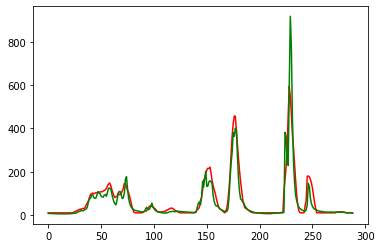

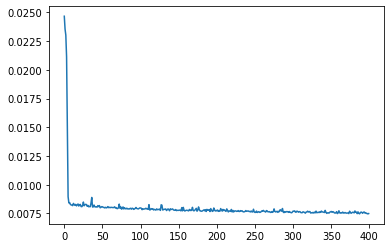

In [58]:
results = model.predict(x_test)

#print  (x_test.shape)

plt.plot(range(289),results*1100, c='r')
plt.plot(range(289),y_test*1100, c='g')
plt.show()

plt.plot(history.history['loss'])
plt.show()